In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Number of train samples: 47149
Number of valid samples: 3039
Total number of samples: 50188


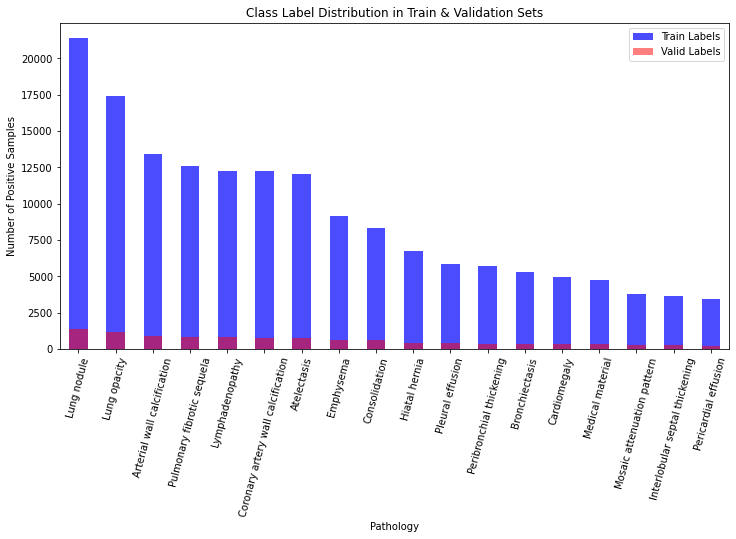

In [20]:
base_path = "/project/project_465001111/ct_clip/CT-CLIP-UT"
train_path = os.path.join(base_path, "labels", "train_labels.csv")
valid_path = os.path.join(base_path, "labels", "valid_labels.csv")

train_df = pd.read_csv(train_path)
valid_df = pd.read_csv(valid_path)

print(f"Number of train samples: {train_df.shape[0]}")
print(f"Number of valid samples: {valid_df.shape[0]}")
print(f"Total number of samples: {train_df.shape[0] + valid_df.shape[0]}")

train_label_counts = train_df.iloc[:, 1:].sum()
valid_label_counts = valid_df.iloc[:, 1:].sum()

plt.figure(figsize=(12,6))
train_label_counts.sort_values(ascending=False).plot(kind='bar', color='blue', alpha=0.7, label="Train Labels")
valid_label_counts.sort_values(ascending=False).plot(kind='bar', color='red', alpha=0.5, label="Valid Labels")
plt.title("Class Label Distribution in Train & Validation Sets")
plt.xlabel("Pathology")
plt.ylabel("Number of Positive Samples")
plt.xticks(rotation=75)
plt.legend()
plt.show()

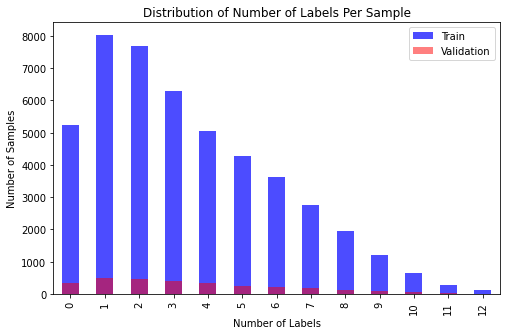

In [21]:
train_df["num_labels"] = train_df.iloc[:, 1:].sum(axis=1)
valid_df["num_labels"] = valid_df.iloc[:, 1:].sum(axis=1)

plt.figure(figsize=(8,5))
train_df["num_labels"].value_counts().sort_index().plot(kind="bar", color="blue", alpha=0.7, label="Train")
valid_df["num_labels"].value_counts().sort_index().plot(kind="bar", color="red", alpha=0.5, label="Validation")
plt.title("Distribution of Number of Labels Per Sample")
plt.xlabel("Number of Labels")
plt.ylabel("Number of Samples")
plt.legend()
plt.show()

In [2]:
from collections import Counter
import re

base_path = "/project/project_465001111/ct_clip/CT-CLIP-UT"
train_reports_path = os.path.join(base_path, "reports", "train_reports.csv")
valid_reports_path = os.path.join(base_path, "reports", "valid_reports.csv")

train_reports_df = pd.read_csv(train_reports_path)
valid_reports_df = pd.read_csv(valid_reports_path)

def create_report_column(df):
    return (df['Findings_EN'].fillna('') + ' ' + df['Impressions_EN'].fillna('')).str.strip()

train_reports_df['report'] = create_report_column(train_reports_df)
valid_reports_df['report'] = create_report_column(valid_reports_df)

combined_df = pd.concat([train_reports_df[['report']], valid_reports_df[['report']]], ignore_index=True)

word_counter = Counter()
for text in combined_df['report']:
    words = re.findall(r'\b\w+\b', text.lower())
    word_counter.update(words)

word_freq_df = pd.DataFrame(word_counter.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

print(word_freq_df)

        word   count
6        the  860452
5         in  727571
11       and  314355
52       was  307115
18        of  281612
...      ...     ...
5130    19mm       1
5132     6cm       1
5134  sights       1
8823    help       1
6998    cali       1

[9782 rows x 2 columns]


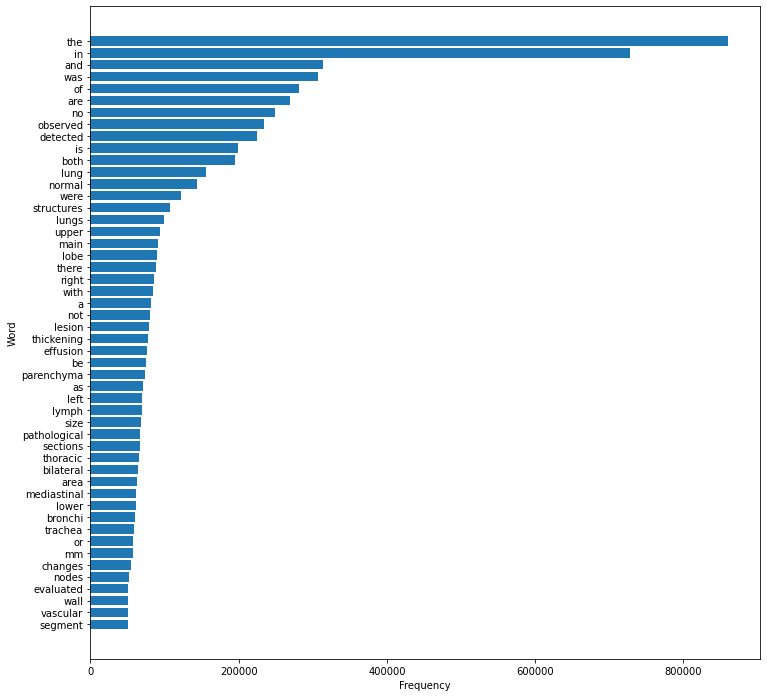

In [28]:
import matplotlib.pyplot as plt

# Get top 50 words
top_n = 50
top_words = word_freq_df.head(top_n)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot()
ax.barh(top_words['word'][::-1], top_words['count'][::-1])
ax.set_xlabel('Frequency')
ax.set_ylabel('Word')
plt.show()
fig.savefig('top_words_frequency.png', dpi=600)
plt.close(fig)


In [5]:
top_50_words = word_freq_df.head(50)['word'].tolist()
print(top_50_words)

['the', 'in', 'and', 'was', 'of', 'are', 'no', 'observed', 'detected', 'is', 'both', 'lung', 'normal', 'were', 'structures', 'lungs', 'upper', 'main', 'lobe', 'there', 'right', 'with', 'a', 'not', 'lesion', 'thickening', 'effusion', 'be', 'parenchyma', 'as', 'left', 'lymph', 'size', 'pathological', 'sections', 'thoracic', 'bilateral', 'area', 'mediastinal', 'lower', 'bronchi', 'trachea', 'or', 'mm', 'changes', 'nodes', 'evaluated', 'wall', 'vascular', 'segment']


In [ ]:
# Ask GPT4 to extract only medically relevant words (anatomical regions, pathologies etc)
pathological_regions = [
    'lung', 'lungs', 'lobe', 'parenchyma', 'lymph', 'nodes', 'mediastinal',
    'thoracic', 'bronchi', 'trachea', 'wall', 'segment', 'bone', 'heart', 'abdominal',
    'pericardial', 'pleural', 'space', 'esophagus', 'aorta', 'hilar', 'mediastinum',
    'liver', 'adrenal', 'vertebral', 'corpus', 'organs', 'paratracheal'
]

['lung', 'lungs', 'lobe', 'lesion', 'thickening', 'effusion', 'parenchyma', 'left', 'lymph', 
'pathological', 'thoracic', 'bilateral', 'mediastinal', 'bronchi', 'trachea', 'nodes', 'wall', 
'vascular', 'segment']


# Ask GPT4 to combine words to form multi-word terms 
valid_compound_terms = [
    'lymph nodes',
    'mediastinal lymph',
    'pleural effusion',
    'ground glass',
    'lung parenchyma',
    'right lobe',
    'left lobe',
    'upper lobe',
    'lower lobe',
    'hilar lymph',
    'mediastinal mass',
    'lung nodules',
    'bone lesion',
    'vascular wall',
    'thoracic lymph',
    'abdominal organs',
    'mediastinal nodes',
    'right lung',
    'left lung'
]

# Ask GPT4 to filter out segmentable words, removin those that require more context or refer to broader or less well-defined areas
segmentable_terms = [
    'lymph nodes',
    'pleural effusion',
    'ground glass',
    'lung parenchyma',
    'right lobe',
    'left lobe',
    'upper lobe',
    'lower lobe',
    'mediastinal mass',
    'lung nodules',
    'bone lesion',
    'right lung',
    'left lung',
    'abdominal organs'
]

[
    'lung parenchyma',
    'lung lesion',
    'left lung',
    'right lung',
    'lymph nodes',
    'mediastinal lymph nodes',
    'thoracic wall',
    'vascular segment',
    'bronchial segment',
    'lower lobe',
    'upper lobe',
    'mediastinal thickening',
    'tracheal wall thickening'
]